# Proporsi Teks

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/PPW/Data PTA Teknik Informatika.csv'
df = pd.read_csv(csv_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.DataFrame (df['abstrak'])
print (data)

                                               abstrak
0    Sistem  informasi  akademik  (siakad) merupaka...
1    Berjalannya koneksi jaringan komputer dengan l...
2    Web server adalah sebuah perangkat lunak serve...
3    Penjadwalan  kuliah  di  perguruan  tinggi  me...
4    Seiring perkembangan teknologi yang ada diduni...
..                                                 ...
850  Toko tas deeolshop menjual berbagai macam tas ...
851  Sepak bola adalah salah satu olahraga yang saa...
852  Perguruan tinggi merupakan salah satu jenjang ...
853  Investasi saham selama ini memiliki resiko ker...
854  Information retrieval (ir) merupakan pengambil...

[855 rows x 1 columns]


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

def cleaning(text):
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())

    # Remove punctuation and numbers
    table = str.maketrans('', '', string.punctuation + string.digits)
    tokens = [word.translate(table) for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove short words
    tokens = [word for word in tokens if len(word) > 2]

    return tokens


In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df=df.astype(str)
df["abstrak"] = df["abstrak"].apply(lambda x: cleaning(x))

abstrak_column = df["abstrak"]

df["abstrak"].head()

0    [sistem, informasi, akademik, siakad, merupaka...
1    [berjalannya, koneksi, jaringan, komputer, den...
2    [web, server, adalah, sebuah, perangkat, lunak...
3    [penjadwalan, kuliah, perguruan, tinggi, merup...
4    [seiring, perkembangan, teknologi, yang, ada, ...
Name: abstrak, dtype: object

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim import corpora

# Create a Dictionary from the tokenized documents
dictionary = Dictionary(df["abstrak"])

# Filter out too rare and too common words
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the tokenized documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in df["abstrak"]]


In [ ]:
# Build the LDA model
num_topics = 5  # You can change this to the desired number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

In [ ]:
# Print the topics and their word distributions
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.012*"data" + 0.009*"yaitu" + 0.009*"wajah" + 0.009*"aplikasi" + 0.009*"prose" + 0.008*"tersebut" + 0.008*"akan" + 0.007*"fitur" + 0.007*"salah" + 0.006*"satu"

Topic: 1
Words: 0.014*"data" + 0.011*"keputusan" + 0.010*"penyakit" + 0.009*"nilai" + 0.009*"oleh" + 0.008*"tersebut" + 0.007*"prose" + 0.007*"akurasi" + 0.007*"akan" + 0.007*"sebesar"

Topic: 2
Words: 0.035*"citra" + 0.015*"prose" + 0.010*"fitur" + 0.010*"akurasi" + 0.010*"yaitu" + 0.009*"bahasa" + 0.008*"nilai" + 0.008*"segmentasi" + 0.007*"algoritma" + 0.007*"sebesar"

Topic: 3
Words: 0.022*"data" + 0.013*"informasi" + 0.013*"nilai" + 0.009*"siswa" + 0.009*"akan" + 0.009*"pemain" + 0.008*"tersebut" + 0.007*"oleh" + 0.007*"prose" + 0.006*"yaitu"

Topic: 4
Words: 0.020*"game" + 0.014*"aplikasi" + 0.013*"pembelajaran" + 0.009*"medium" + 0.008*"siswa" + 0.008*"nilai" + 0.007*"informasi" + 0.007*"teknologi" + 0.007*"belajar" + 0.007*"baik"



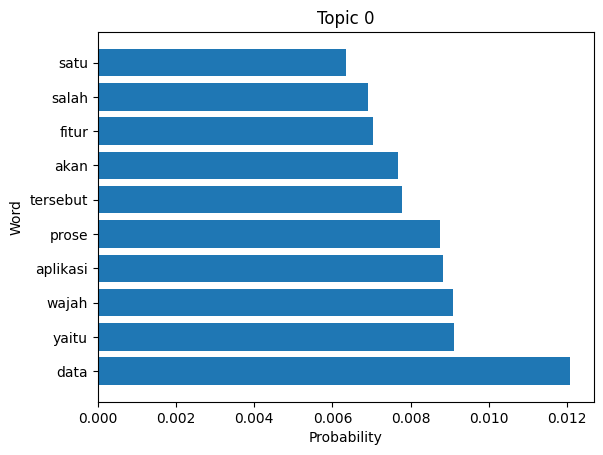

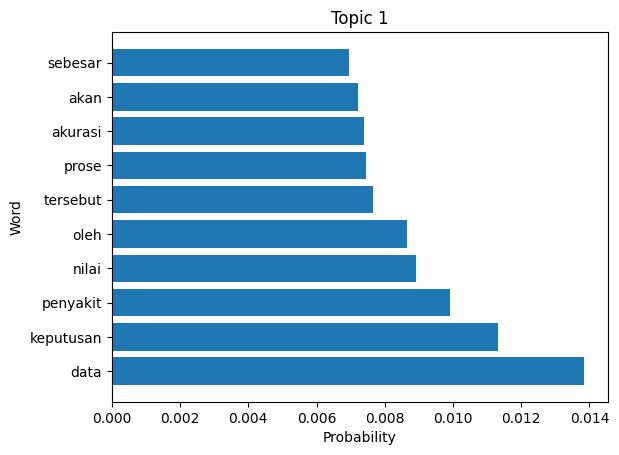

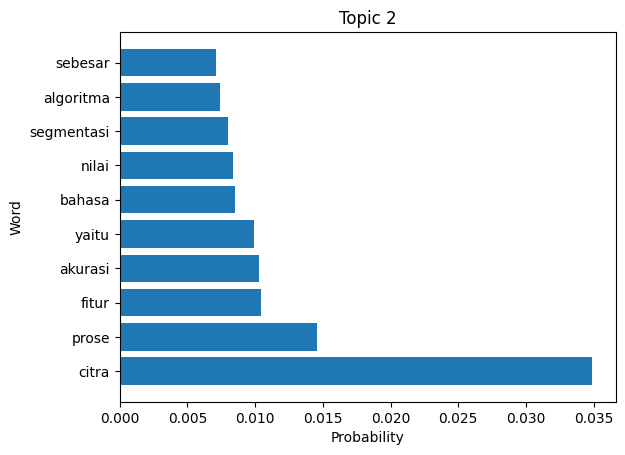

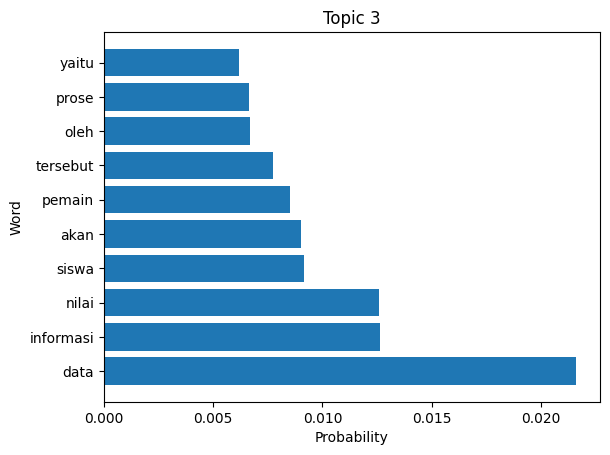

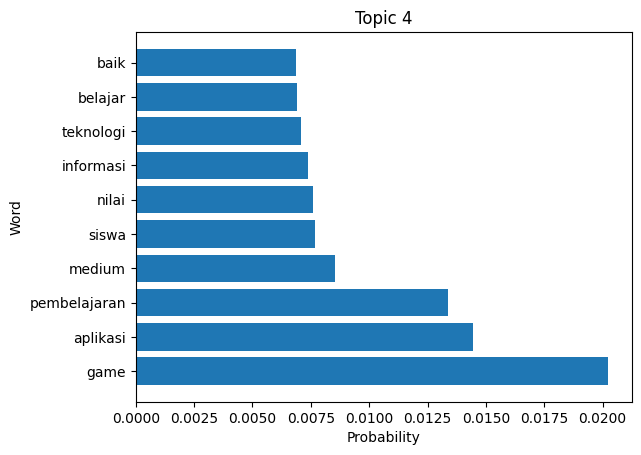

In [ ]:
import matplotlib.pyplot as plt

def visualize_topics(lda_model):
    topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
    for topic_idx, topic_words in topics:
        words = [word[0] for word in topic_words]
        probabilities = [word[1] for word in topic_words]
        plt.barh(words, probabilities)
        plt.title(f"Topic {topic_idx}")
        plt.xlabel("Probability")
        plt.ylabel("Word")
        plt.show()

# Visualize the topics
visualize_topics(lda_model)